In [1]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
matplotlib.style.use('ggplot')#使用ggplot样式
%matplotlib inline

## 有缺失值时候的绘图
pandas尝试绘制包含缺少数据的DataFrames或Series，根据绘图类型，丢失，遗漏或填充缺失值。
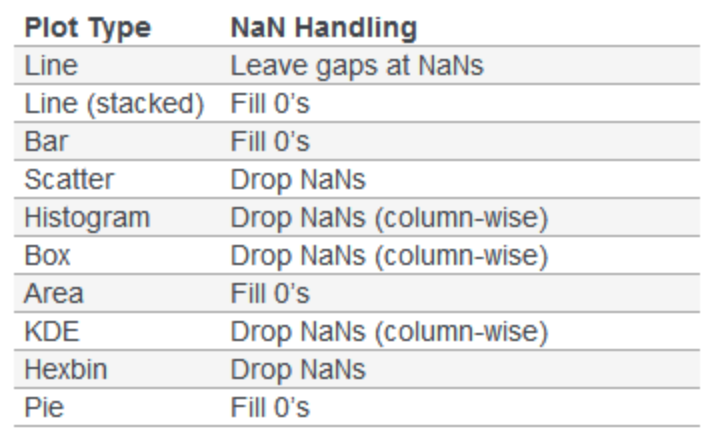
如果任何这些默认值不是您想要的，或者如果要明确地说明如何处理缺少的值，请在绘制之前考虑使用fillna（）或dropna（）。

这些函数可以从pandas.plotting导入，并将一个Series或DataFrame作为参数。

## 散点矩阵
新版本0.7.3

您可以使用pandas.plotting中的scatter_matrix方法创建散点图矩阵：

散点图矩阵是散点图的高维扩展，它从一定程度上克服了在平面上展示高维数据的困难，在展示多维数据的两两关系时有着不可替代的作用。

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x115851940>,
      dtype=object)

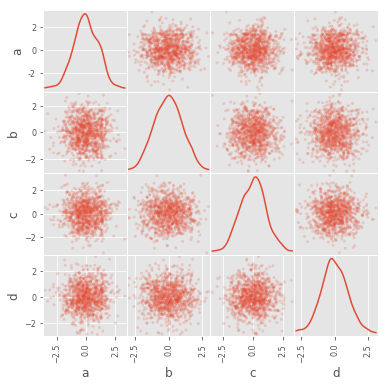

In [2]:
from pandas.plotting import scatter_matrix
df = pd.DataFrame(np.random.randn(1000, 4), columns=['a', 'b', 'c', 'd'])
scatter_matrix(df, alpha=0.2, figsize=(6, 6), diagonal='kde')


In [3]:
# 注：这里的参数除了diagonal，其他在之前的文章基本都讲过，我们通过

?scatter_matrix

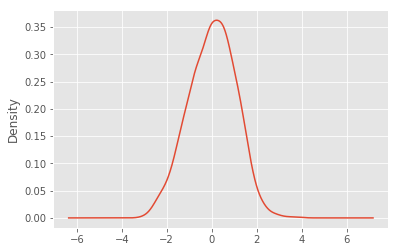

In [4]:
# 查询帮助，了解到diagonal参数有两种选择，还可以选择hist

# 密度图
# 新版本0.8.0
# 您可以使用Series.plot.kde（）和DataFrame.plot.kde（）方法创建密度图。

ser = pd.Series(np.random.randn(1000))
ser.plot.kde()

## 安德鲁斯曲线
安德鲁斯曲线允许将多变量数据绘制为使用样本属性创建的大量曲线作为傅立叶级数的系数。

通过绘制每个类别的这些曲线，可以可视化数据集群。 属于同一类样品的曲线通常会更靠近在一起并形成较大的结构。
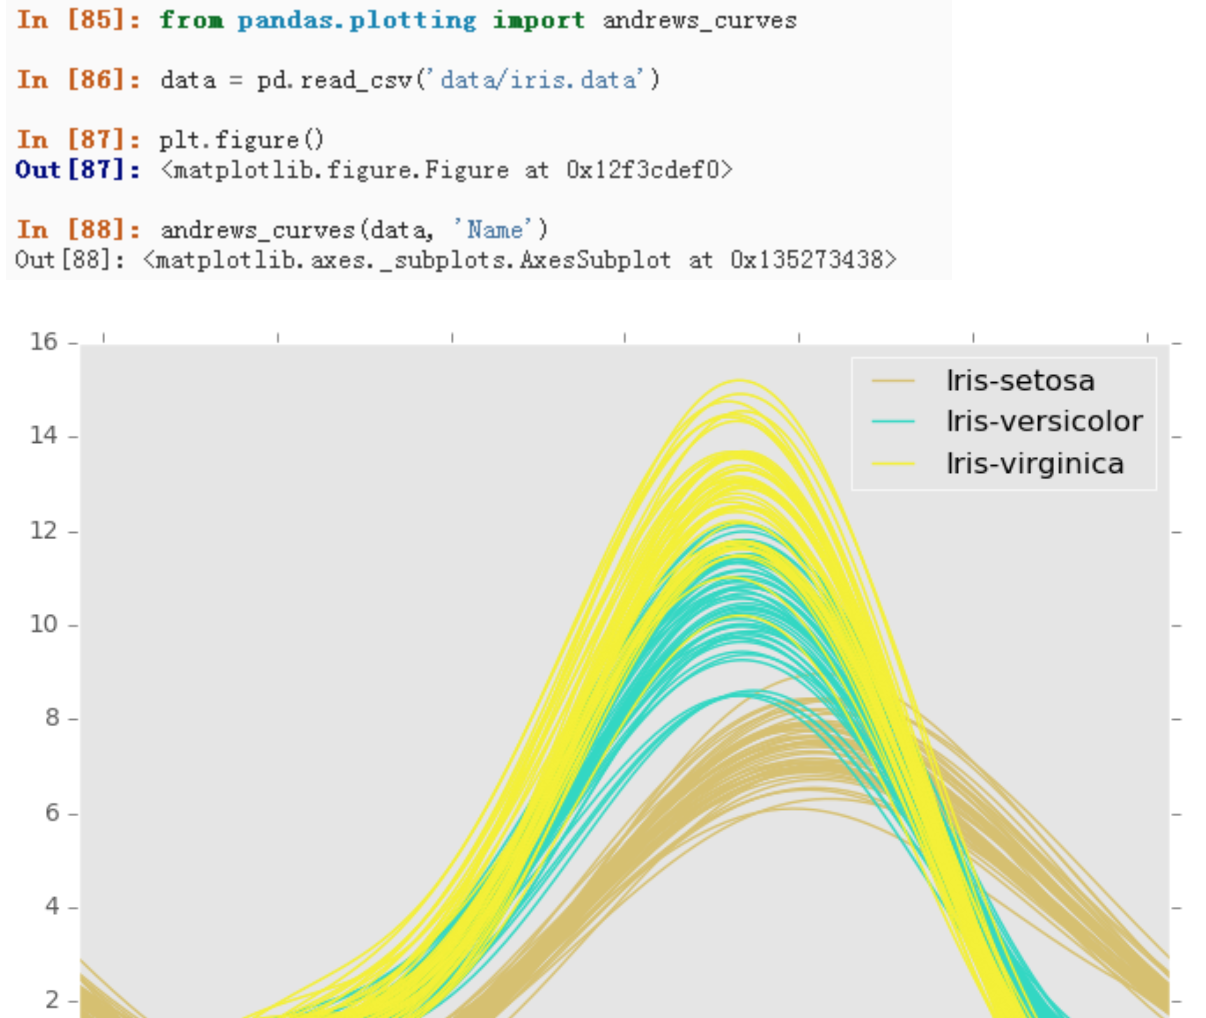

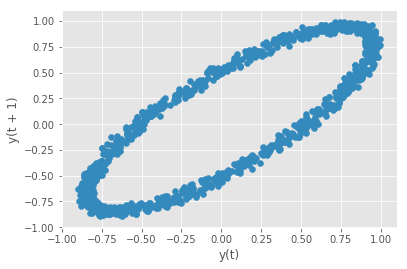

In [6]:
# 滞后图
# 滞后图用于检查数据集或时间序列是否是随机的。 

# 随机数据不应在滞后图中显示任何结构。 非随机结构意味着底层数据不是随机的。

from pandas.plotting import lag_plot
plt.figure()
data = pd.Series(0.1 * np.random.rand(1000) +
0.9 * np.sin(np.linspace(-99 * np.pi, 99 * np.pi, num=1000)))
lag_plot(data)
# 从图中可以看出y（t）整体是有周期性的

## 自相关图
自相关图经常用于检查时间序列中的随机性。 这是通过在不同的时间滞后计算数据值的自相关来完成的。

 如果时间序列是随机的，对于任何和所有时滞分离，这种自相关应该接近零。 

如果时间序列是非随机的，则一个或多个自相关将显着非零。 

图中显示的水平线对应于95％和99％置信区。 虚线为99％置信区。



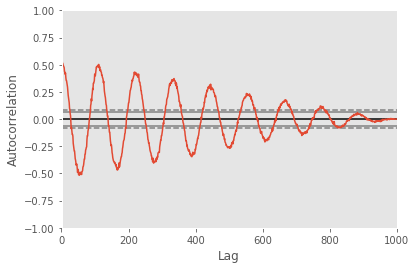

In [7]:
from pandas.plotting import autocorrelation_plot

plt.figure()
data = pd.Series(0.7 * np.random.rand(1000) +
0.3 * np.sin(np.linspace(-9 * np.pi, 9 * np.pi, num=1000)))
autocorrelation_plot(data)

## 引导图
引导图用于视觉评估统计量的不确定性，例如平均值，中值，中等等。

从数据集中选择指定大小的随机子集，为该子集计算所讨论的统计量，并且过程为重复指定次数。 

结果图和直方图构成引导图。

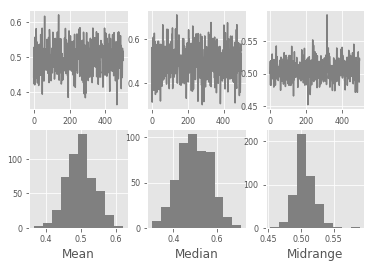

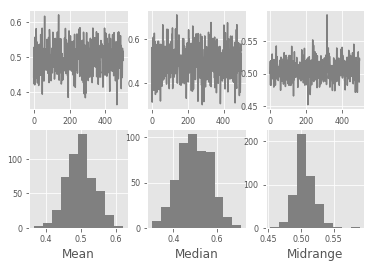

In [8]:
from pandas.plotting import bootstrap_plot
data = pd.Series(np.random.rand(1000))
bootstrap_plot(data, size=50, samples=500, color='grey')